In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale = 2)
color = sns.color_palette("pastel")


# Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

#### Name / Data Type / Measurement Unit / Description
-----------------------------
* Sex / nominal / -- / M, F, and I (infant)
* Length / continuous / mm / Longest shell measurement
* Diameter / continuous / mm / perpendicular to length
* Height / continuous / mm / with meat in shell
* Whole weight / continuous / grams / whole abalone
* Shucked weight / continuous / grams / weight of meat
* Viscera weight / continuous / grams / gut weight (after bleeding)
* Shell weight / continuous / grams / after being dried
* Rings / integer / -- / +1.5 gives the age in years


### Your challenge
##### Create a report that covers the following:

* How does weight change with age for each of the three sex categories?
* Can you estimate an abalone's age using its physical characteristics?
* Investigate which variables are better predictors of age for abalones.

In [7]:
df = pd.read_csv('abalone.csv')
df.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [8]:
df.shape

(4177, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [10]:
df.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [11]:
df.duplicated().sum()

0

<AxesSubplot:ylabel='Frequency'>

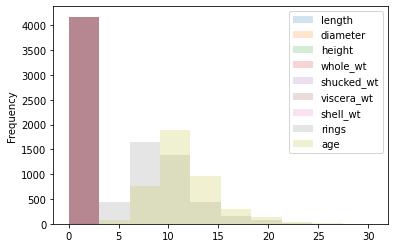

In [12]:
df.plot(kind='hist', alpha=.2)

In [43]:
color = sns.color_palette("pastel")

([<matplotlib.axis.XTick at 0x2840c1751c0>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Infant')])

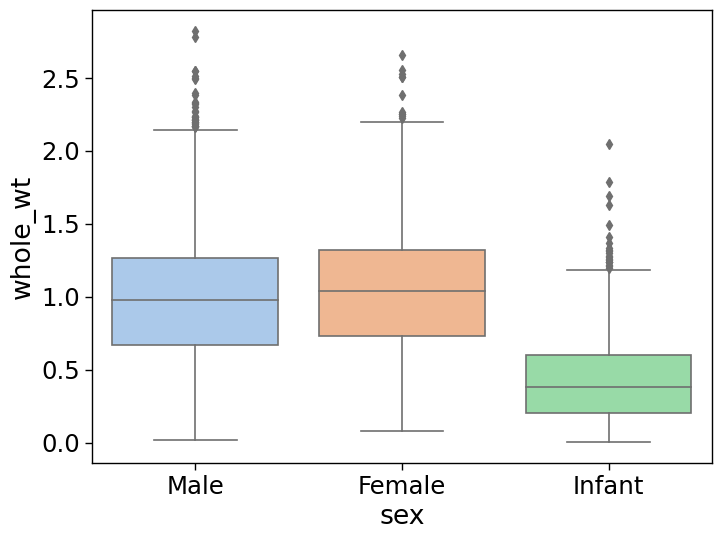

In [79]:
plt.figure(figsize=(8, 6), dpi=100)
sns.boxplot(x='sex', y='whole_wt', data=df,
            palette = color[:4])
plt.xticks([0,1,2], ['Male','Female' ,'Infant'])

<AxesSubplot:>

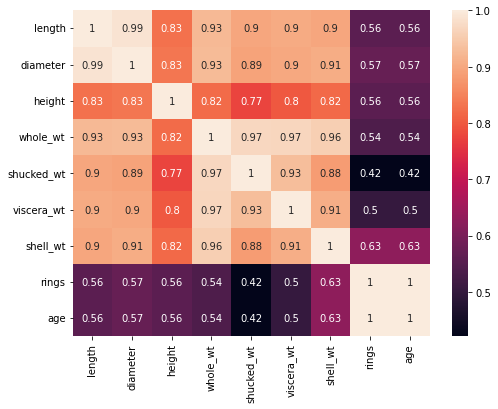

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)

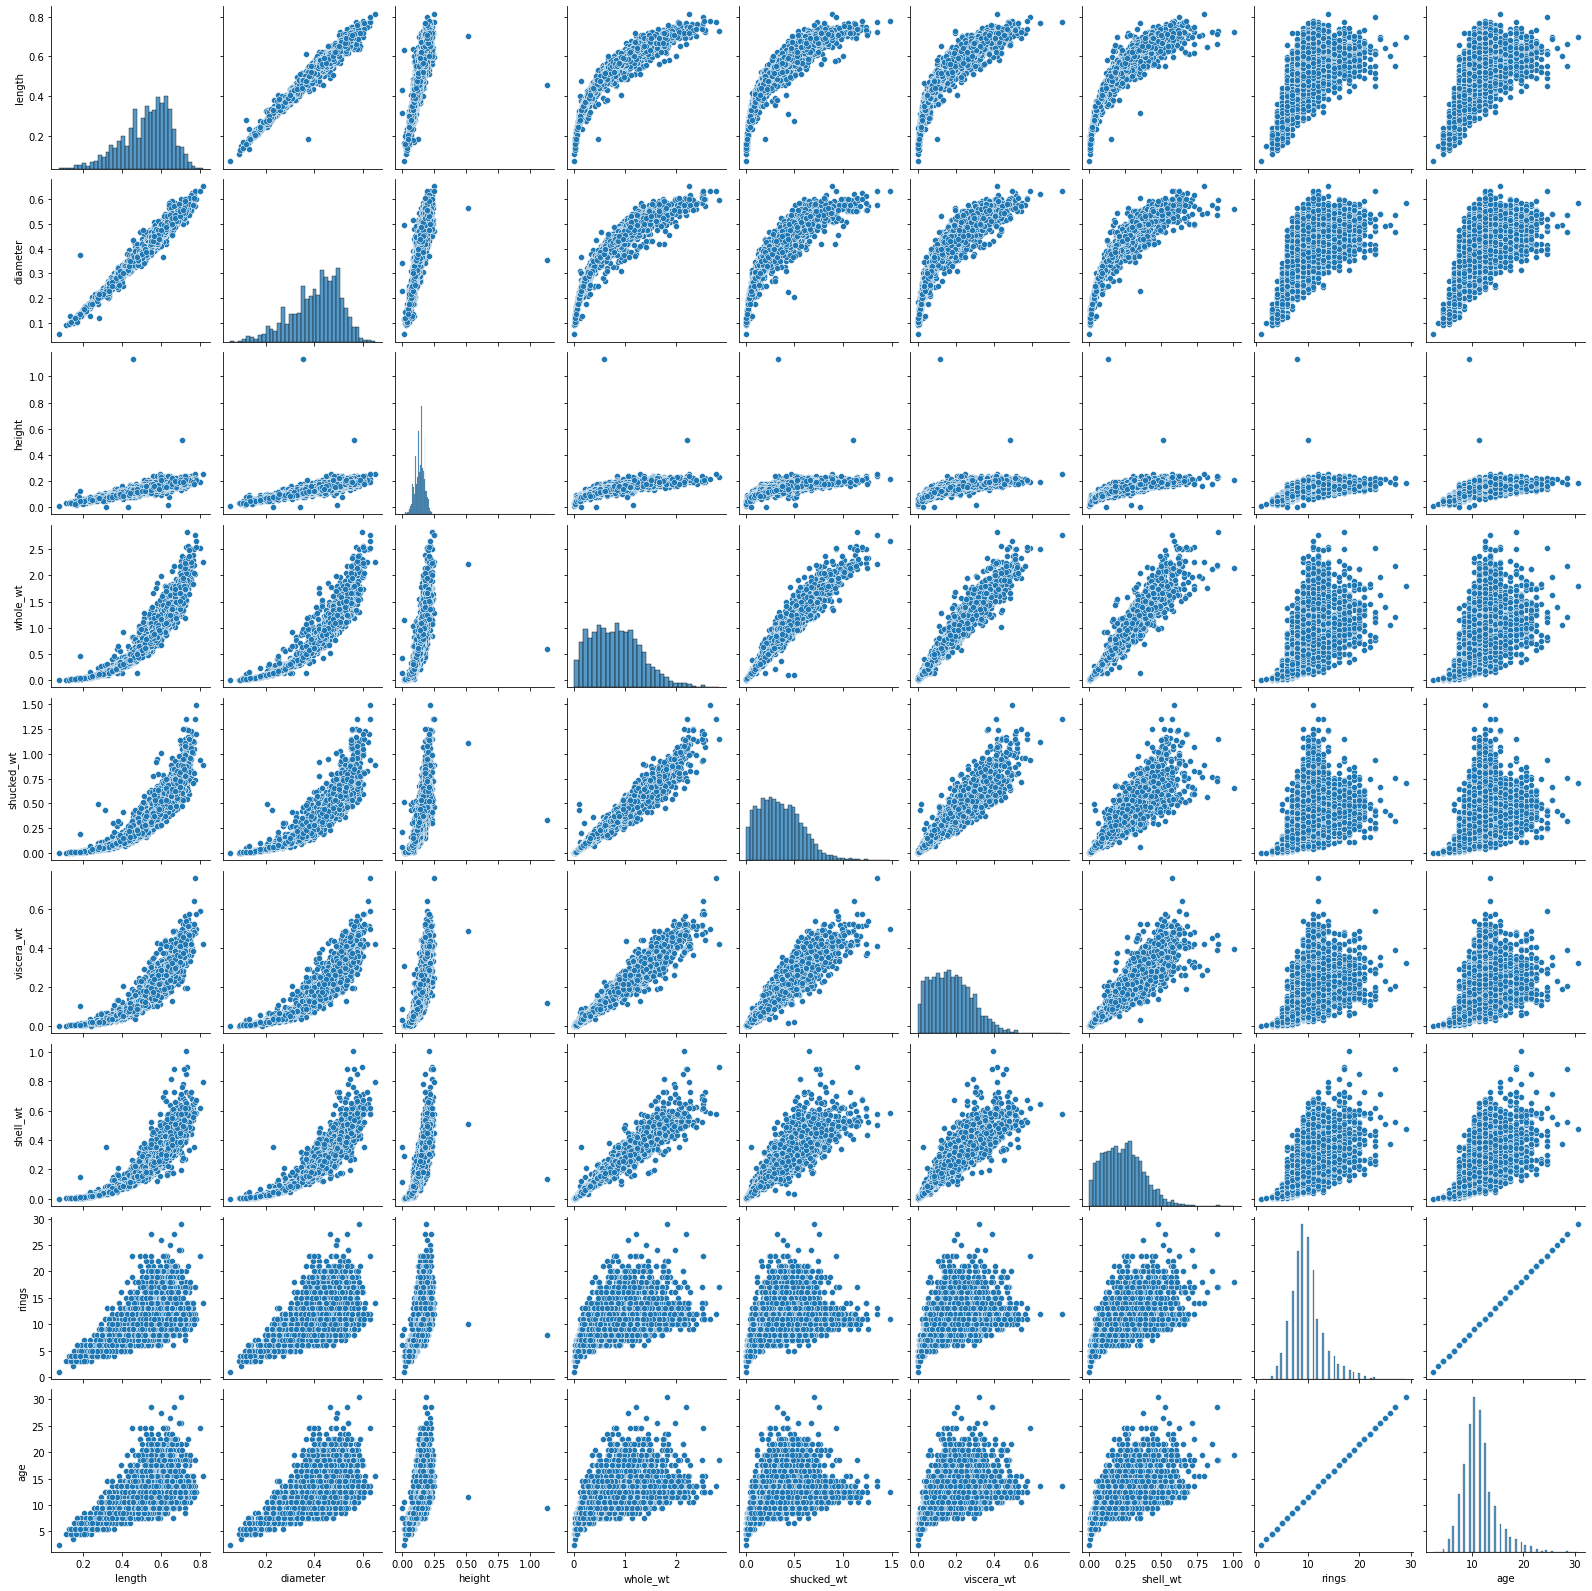

In [17]:
sns.pairplot(df)

In [18]:
df

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [32]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## How does weight change with age for each of the three sex categories?

In [98]:
def scatter_plt(x, y, x_label, y_label, h="", data=""):
    plt.figure(figsize=(12, 8), dpi=100)
    sns.lmplot(x=x, y=y, hue=h, data=data,
                    palette = color[:4],
                    height=8,
                    scatter_kws={"s": 100, 'alpha': 0.5})
    plt.xlabel(x_label)
    plt.ylabel(y_label)

<Figure size 1200x800 with 0 Axes>

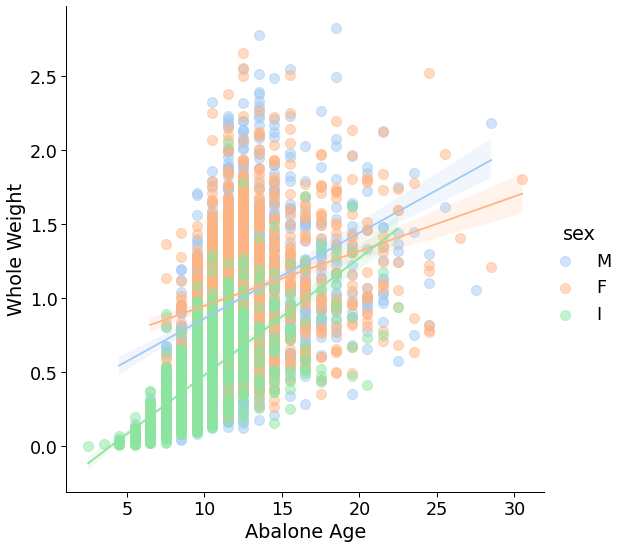

In [99]:
scatter_plt('age', 'whole_wt', 'Abalone Age', 'Whole Weight', 'sex', df)

> Observations
* Whole weight increases with age in the *Infant* sex group
* The is no clear rlationship between the age and whole weights in abalones for the *Male* and *Female* groups.
* The *Male* and *Female* abalones have the highest variation in theri weights between ages 10 and 15 years.

* What could be the cause of these variations at these age range.

<Figure size 1200x800 with 0 Axes>

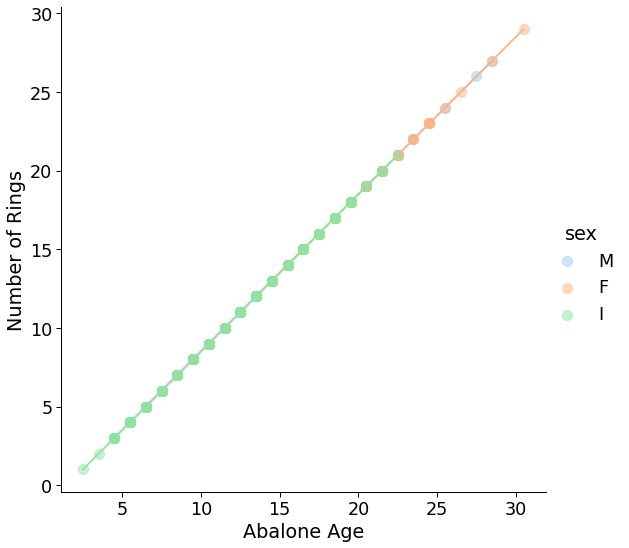

In [100]:
scatter_plt('age', 'rings', 'Abalone Age', 'Number of Rings', 'sex', df)

> Observations
* There is a clear correlation between the Age of the abalone and the number of rings for all the sexes.
* This indicates that the abalones ages can be predicted using the number of rings that the shell has.

(          shell_wt     rings
 shell_wt  1.000000  0.627574
 rings     0.627574  1.000000,
           shell_wt     rings
 shell_wt  1.000000  0.405907
 rings     0.405907  1.000000)

<Figure size 1200x800 with 0 Axes>

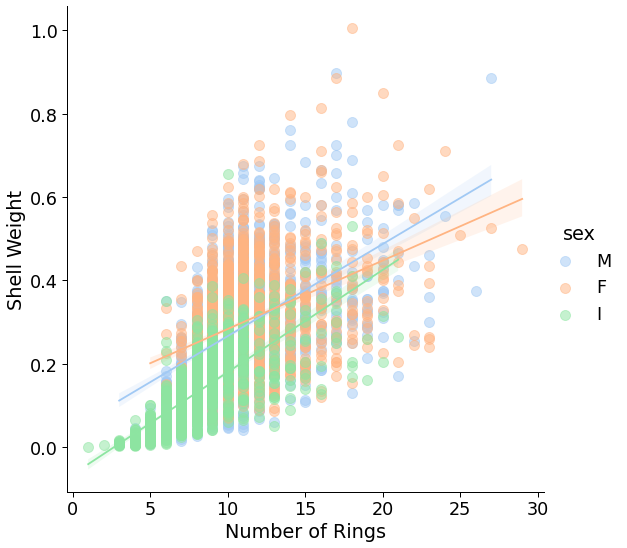

In [101]:
scatter_plt('rings', 'shell_wt', 'Number of Rings', 'Shell Weight', 'sex', df)
df[['shell_wt', 'rings']].corr(), df[df.sex == 'F'][['shell_wt', 'rings']].corr()

> Observations
* The is a low positive correlation (r=0.63) between the shell weight and the number of rings an abalone has.
* For the *Infant* group the correlation (r = 0.73) increases by 10%, and decreases to r=0.51 and r=0.41 for the *Male* and *Female* groups respectively.

In [128]:
df['sex_encode'] = df.sex.map({'M': 0, 'F': 1, 'I': 2})

In [132]:
X = df.drop(['sex', 'age'], axis = 1)
y = df.age

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [134]:
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

## PLS Regression

### Can you estimate an abalone's age using its physical characteristics?

<AxesSubplot:>

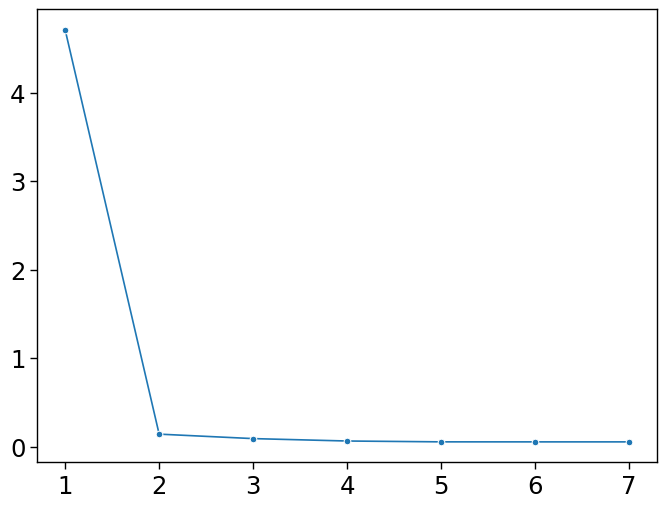

In [142]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score, cross_validate
mse = []
for n in range(1, 8):
    pls = PLSRegression(n_components=n)
    pls.fit(X_train, y_train)
    predicted = pls.predict(X_test)
    mse.append(mean_squared_error(y_test, predicted))
    
plt.figure(figsize=(8, 6), dpi=100)
sns.lineplot(x =range(1, 8), y = mse, marker='o')
    

In [173]:
pls_opt = PLSRegression(n_components=n)
pls_opt.fit(X_train, y_train)

cal = pls_opt.predict(X_train)

predicted = pls_opt.predict(X_test)

pls_cv = cross_validate(pls_opt, X_train, y_train, cv=10, scoring = ['r2', 'neg_mean_squared_error'])

predicted = [item for sublist in predicted for item in sublist]
cal = [item for sublist in cal for item in sublist]

print('RMSE_Cal')
print(mean_squared_error(y_train, cal))
print('Rsq_Cal')
print(r2_score(y_train, cal))
print('\n')
print('RMSE_CV')
print(np.abs(pls_cv['test_neg_mean_squared_error']).mean())
print('Rsq_CV')
print(pls_cv['test_r2'].mean())
print('\n')
print('RMSE_Validation')
print(mean_squared_error(y_test, predicted))
print('Rsq_Validation')
print(r2_score(y_test, predicted))

RMSE_Cal
1.9952322252004535e-05
Rsq_Cal
0.9999981142162344


RMSE_CV
2.0276308858325268e-05
Rsq_CV
0.9999980324110821


RMSE_Validation
0.05484648108187136
Rsq_Validation
0.9945229205810883


C:\Users\adejimi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Age')

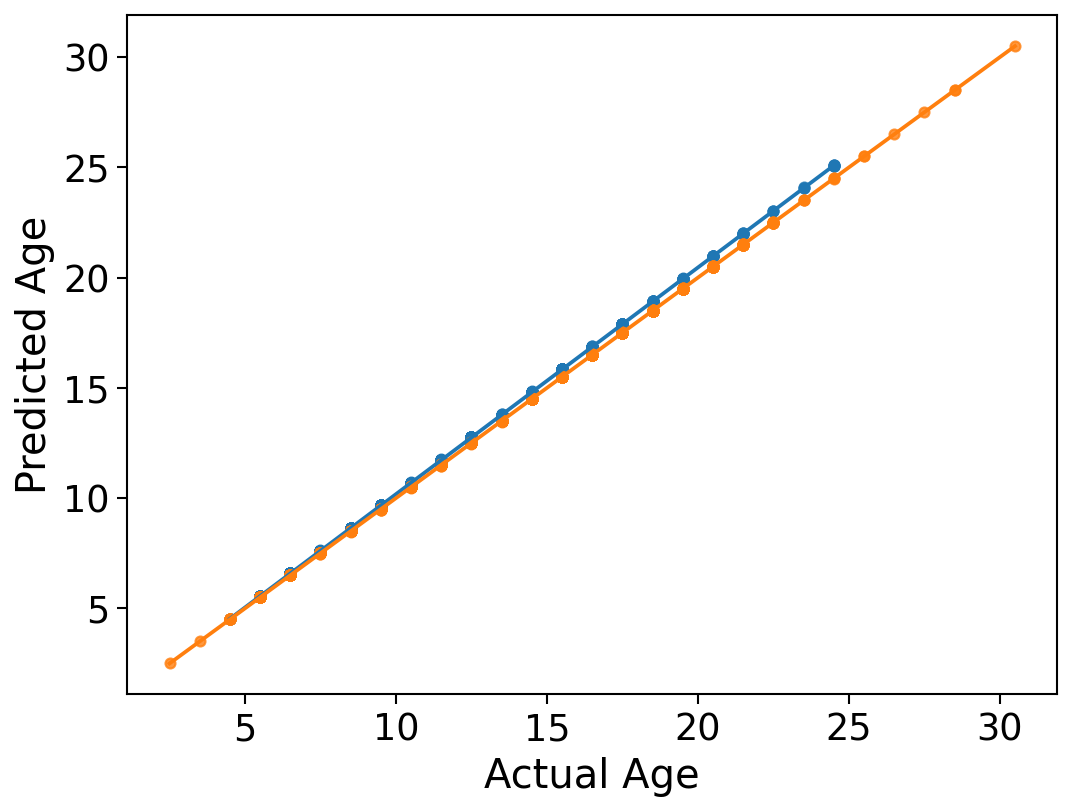

In [196]:
plt.figure(figsize=(8, 6), dpi=150)
sns.regplot(y_test, predicted, label='Test')#, s=15)
sns.regplot(y_train, cal, label='Cal')#,, s=15)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')

## Investigate which variables are better predictors of age for abalones.

<BarContainer object of 9 artists>

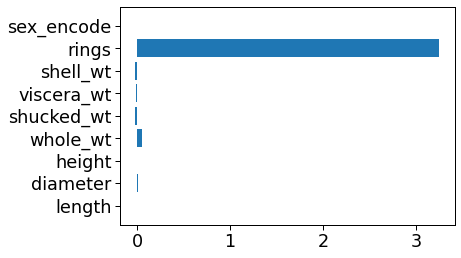

In [192]:
coefficients = [item for sublist in pls_opt.coef_ for item in sublist]
plt.barh(width =coefficients, y = X.columns)

## Random Forest Regression

### Can you estimate an abalone's age using its physical characteristics?

In [194]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_cal = rf.predict(X_train)
rf_pred = rf.predict(X_test)
rf_cv = cross_validate(rf, X_train, y_train, cv=10, scoring = ['r2', 'neg_mean_squared_error'])

In [195]:
print('RMSE_Cal')
print(mean_squared_error(y_train, rf_cal))
print('Rsq_Cal')
print(r2_score(y_train, rf_cal))
print('\n')
print('RMSE_CV')
print(np.abs(rf_cv['test_neg_mean_squared_error']).mean())
print('Rsq_CV')
print(rf_cv['test_r2'].mean())
print('\n')
print('RMSE_Validation')
print(mean_squared_error(y_test, rf_pred))
print('Rsq_Validation')
print(r2_score(y_test, rf_pred))

RMSE_Cal
0.0006015469613259659
Rsq_Cal
0.9999431450896004


RMSE_CV
0.005736656582374648
Rsq_CV
0.999537785855449


RMSE_Validation
0.015968741450068397
Rsq_Validation
0.9984053295048859


Text(0, 0.5, 'Predicted Age')

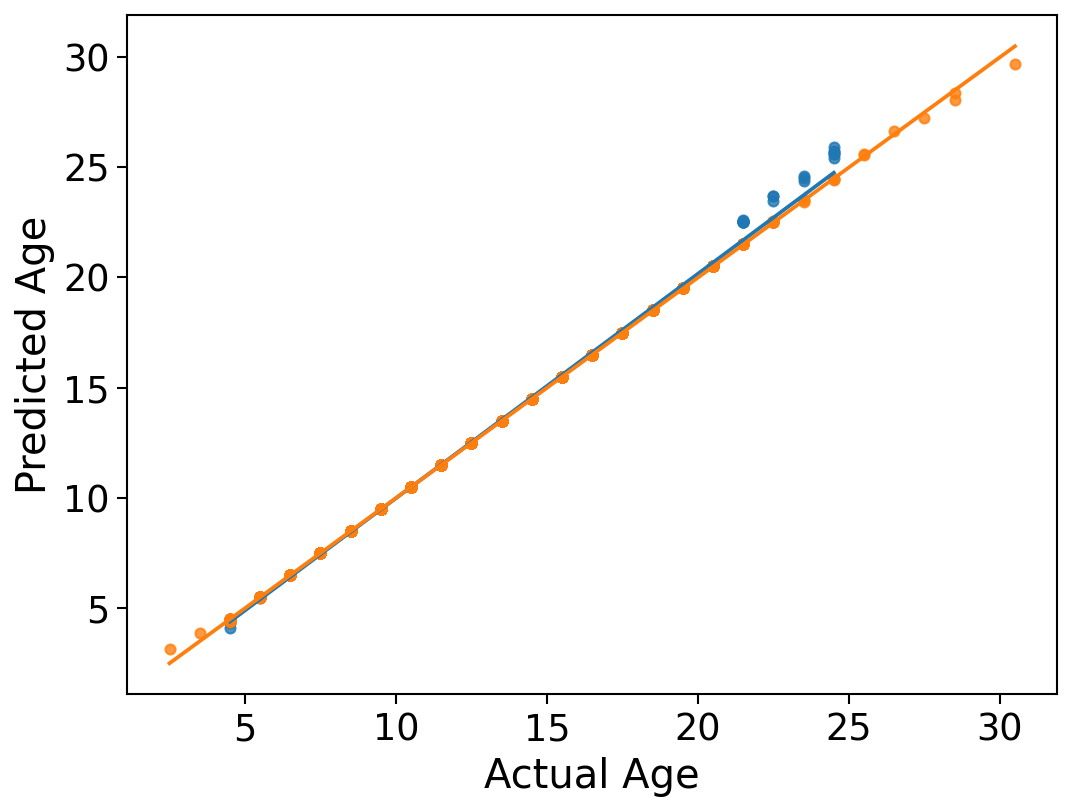

In [197]:
plt.figure(figsize=(8, 6), dpi=150)
sns.regplot(y_test, rf_pred, label='Test')#, s=15)
sns.regplot(y_train, rf_cal, label='Cal')#,, s=15)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')

## Investigate which variables are better predictors of age for abalones.

<BarContainer object of 9 artists>

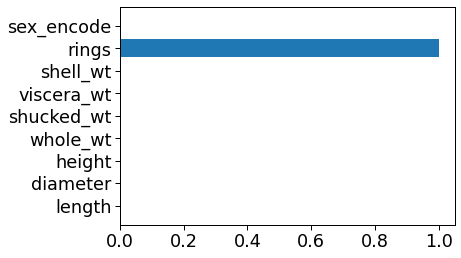

In [199]:
plt.barh(width =rf.feature_importances_, y = X.columns)

(-0.1, 0.1)

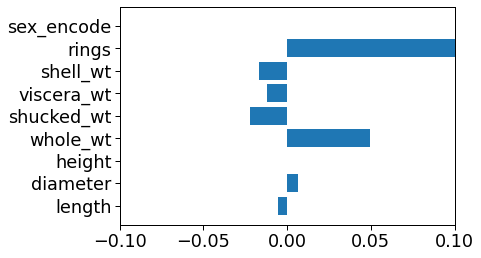

In [202]:
plt.barh(width =coefficients, y = X.columns)
plt.xlim(-0.1, 0.1)